# Data Analysis: Bike Share Data
## Chris Turner - Aug 30, 2018

In [1]:
import csv
import pandas as pd
import numpy as np
import datetime as dt


In [2]:
st = pd.read_csv('./assets/cycle-share-dataset/station.csv')
tr = pd.read_csv('./assets/cycle-share-dataset/trip.csv', error_bad_lines=False)
we = pd.read_csv('./assets/cycle-share-dataset/weather.csv')

b'Skipping line 50794: expected 12 fields, saw 20\n'


## 1. What is the average trip duration for a borrowed bicycle?

In [3]:
tr.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [4]:
trip_mean = tr.tripduration.mean()

### 1178.2956753399776
##  2. What’s the most common age of a bicycle-sharer?


In [5]:
mode_year = tr.birthyear.mode()
current_year = dt.date.today().year
age = current_year - mode_year

### 31

## 3. Given all the weather data here, find the average precipitation per month, and the median precipitation

In [46]:
we.Date = pd.to_datetime(we.Date)
we['Day_of_week'] = we.Date.dt.weekday_name
we['Month'] = we.Date.dt.month
we['Year'] = we.Date.dt.year

In [7]:
print('mean per month:')
print(we.groupby('Month')['Precipitation_In'].mean())

print('median:')
print(we.groupby('Month')['Precipitation_In'].mean().median())


mean per month:
Month
1     0.143548
2     0.168421
3     0.156935
4     0.051333
5     0.012419
6     0.030500
7     0.012097
8     0.018226
9     0.041000
10    0.189000
11    0.187833
12    0.236290
Name: Precipitation_In, dtype: float64
median:
0.09744086021505376


## 4. What’s the average number of bikes at a given bike station?

In [8]:
st.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [9]:
st['install_dockcount'].mean()

17.586206896551722

### 17.586206896551722

## 5. When a bike station is modified, is it more likely that it’ll lose bikes or gain bikes? How do you know?

In [10]:
# st['modification_date'] = st['modification_date'].notnull()

In [11]:
modified = st[['station_id', 'modification_date', 'install_dockcount', 'current_dockcount', 'decommission_date']]

In [14]:
modified = modified.dropna(subset=['modification_date'])
# modified = modified[np.isfinite(modified['decommission_date'])]
# modified = modified.dropna([modified['current_dockcount'] == 0])
modified['decommission_date'] = st['decommission_date'].notnull()
modified = modified[modified.decommission_date != True]
modified.head(13)

,station_id,modification_date,install_dockcount,current_dockcount,decommission_date
7,CBD-06,11/9/2015,20,18,False
12,CH-02,2/24/2015,18,20,False
17,CH-08,2/24/2015,28,26,False
22,DPD-03,3/24/2015,30,24,False
23,EL-01,3/27/2015,12,16,False
31,SLU-01,2/24/2015,18,20,False
35,SLU-15,3/13/2015,12,20,False
37,SLU-17,2/23/2015,18,16,False
39,SLU-19,3/4/2015,12,16,False
47,UW-02,2/20/2015,12,14,False


In [15]:
# drop = st.index[st['current_dockcount'] == 0].tolist()

In [16]:
# modified = modified[np.isfinite(modified['decommission_date'])]
# modified[modified.decommission_date != True]
# modified
install_mean = modified.install_dockcount.mean()

install_mean

17.692307692307693

In [17]:
current_mean = modified.current_dockcount.mean()
current_mean

18.0

### After being modified, the stations gain bikes, on average its  half a bike


## Come up with 3 more questions that can be answered with this data set.

## 1. Compair the average rain per month against average rides per month, is there a corellation? 

In [18]:
rain = we.groupby('Month')['Precipitation_In'].mean()
rain

Month
1     0.143548
2     0.168421
3     0.156935
4     0.051333
5     0.012419
6     0.030500
7     0.012097
8     0.018226
9     0.041000
10    0.189000
11    0.187833
12    0.236290
Name: Precipitation_In, dtype: float64

In [24]:
# tr = pd.read_csv('./assets/cycle-share-dataset/trip.csv', error_bad_lines=False)
# we.Date = pd.to_datetime(we.Date)
tr.starttime = pd.to_datetime(tr.starttime)
tr['Month'] = tr.starttime.dt.month
# tr['Year'] = we.Date.dt.year


In [26]:
rides_per_month = tr.groupby('Month')['trip_id'].count()

In [27]:
rain_totals = (we.groupby('Month')['Precipitation_In'].sum())

In [29]:
compare = pd.concat([rides_per_month, rain_totals], axis=1)
compare

,trip_id,Precipitation_In
Month,,
1,19898,8.90
2,20446,9.60
3,26933,9.73
4,27802,3.08
5,26035,0.77
6,27547,1.83
7,32150,0.75
8,30239,1.13
9,13134,1.23


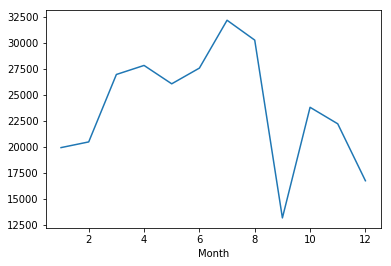

In [33]:
# compare = compare.pivot(index='Month', columns='color', values='y')
%matplotlib inline
import matplotlib.pyplot as plt
rides_per_month.plot()

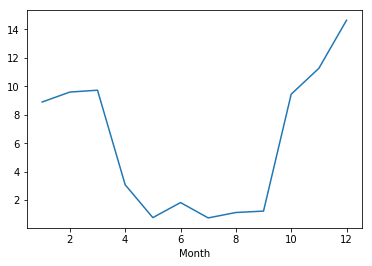

In [34]:
rain_totals.plot()

### Mostly, there is a possitive correlation between amount of rain and number of rides taken

## 2. What is the busiest bike share month, least busy? 

### Busiest: July with 32150 rides
### Slowest: Sept. with 13134 rides


## 3. What is the peek bike share ride time of day? 

In [45]:
tr['Start_hour'] = tr.starttime.dt.hour
rides_per_hour = tr.groupby('Start_hour')['trip_id'].count()


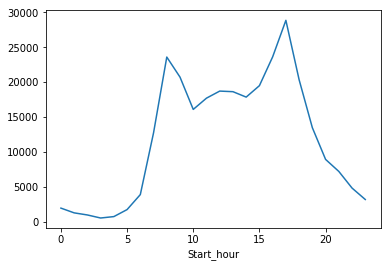

In [44]:
rides_per_hour.plot()

## 17:00 hours (5PM)